In [1]:
from analysis import actions, collectConnections
import pandas as pd
import re
from matplotlib import pyplot as plt

from datetime import datetime
from dateutil.parser import parse

In [255]:

def regexer(string_to_regex):
  return re.compile(string_to_regex, re.IGNORECASE)


referred = regexer("refer[re]{2}d")
read = regexer("read[.,;'\s]?(second|third)*")
new_draft = regexer("new draft")
rules_suspended = regexer("rules?.*sus?pe[nd]{2}ed")
engrossed = regexer("engrossed")
accompanied = regexer("accompanied")
adopted = regexer("adopted")
enacted = regexer("enacted")


statuses = {
  "referred": referred, 
  "read": read,
  "new_draft": new_draft,
  "rules_suspended": rules_suspended, 
  "engrossed": engrossed,
  "accompanied": accompanied,
  "adopted": adopted,
  "enacted": enacted,
  "also_based": regexer("also based on"),
  "accompanying": regexer("accompanying"),
  "Amended": regexer("Amended"),
  "Amendment": regexer("Amendment"),
  "Reported": regexer("Reported"),
  "Bills_in_3rd_report": regexer("Bills in (?:the )?third reading"),
  "chapter": regexer("chapter"),
  "committee_onof_conf": regexer("committee o[nf] conference"),
  "committee_recommended": regexer("committee recommended"),
  "discharged": regexer("discharged"),
  "consolidated": regexer("consolidated"),
  "for message": regexer("for message"),
  "for senate actions": regexer("for senate actions"),
  "postponed": regexer("postponed"),
  "hearing_any": regexer("hearing"),
  "non-concurred": regexer("non-concurred"),
  "concurred": regexer("(?!non-)concurred"),
  "veto": regexer("veto"),
  "receded": regexer("receded"),
  "session_recessed": regexer("session held and recessed"),
  "laid aside": regexer("laid aside"),
  "laid before gov": regexer("laid before the governor"),
  "motion": regexer("motion"),
  "accepted": regexer("accepted"),
  "rejected": regexer("rejected"),
  "ordered to": regexer("ordered to"),
  "ought": regexer("ought"),
  "placed": regexer("placed"),
  "point of order": regexer("point of order"),
  "new text": regexer("new text"),
  "order considered": regexer("order considered"),
  "called for consideration": regexer("called for consideration"),
  "roll call": regexer("roll call"),
  "recommitted": regexer("recommitted"),
  "negatived": regexer("negatived"),
  "date extended": regexer("date extended"),
  "returned": regexer("returned"),
  "see": regexer("see"),
  "substituted": regexer("substituted"),
  "taken": regexer("taken"),
  "Secretary of State": regexer("Secretary of State"),
  "plan approved": regexer("plan approved"),
  "recommended": regexer("(?<!Committee) recommended (?!committee)"),
  "committee recommended": regexer("Committee recommended")
}

df = pd.DataFrame(actions)

for k, v in statuses.items():
  df[k] = df['action'].str.contains(v)   
    
df_dropped = df.drop(['action', 'branch', 'date'], axis=1).copy()

df_dropped['count trues'] = df_dropped[list(statuses.keys())].sum(axis=1)

df_dropped[df_dropped["count trues"] > 3]

/tmp/ipykernel_381910/1363735325.py:73: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[k] = df['action'].str.contains(v)


,Index,id,referred,read,new_draft,rules_suspended,engrossed,accompanied,adopted,enacted,...,date extended,returned,see,substituted,taken,Secretary of State,plan approved,recommended,committee recommended,count trues
86,86,H1014,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4
180,180,H1038,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4
443,443,H1089,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4
497,497,H11,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,5
895,895,H1179,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44769,44769,S87,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,6
44954,44954,S9,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,4
44969,44969,S9,False,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,True,False,7
45088,45088,S923,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,6


In [152]:

dfg.isnull().mean(axis=1)

0        0.470588
1        0.705882
2        0.588235
3        0.705882
4        0.705882
           ...   
45467    0.705882
45468    0.705882
45469    0.705882
45470    0.588235
45471    0.588235
Length: 45472, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


      referred_date ways_and_means_date passed_chamber_date enacted_date  \
0        2021-02-25          2021-02-25                 NaT          NaT   
1               NaT                 NaT                 NaT          NaT   
2        2021-04-13                 NaT                 NaT          NaT   
3               NaT                 NaT                 NaT          NaT   
4               NaT                 NaT                 NaT          NaT   
...             ...                 ...                 ...          ...   
45467           NaT                 NaT                 NaT          NaT   
45468           NaT                 NaT                 NaT          NaT   
45469           NaT                 NaT                 NaT          NaT   
45470           NaT                 NaT                 NaT          NaT   
45471           NaT                 NaT                 NaT          NaT   

      governor_signed_date  
0                      NaT  
1                      NaT  


(array([[6.400e+01, 6.132e+03, 3.240e+02, 3.010e+02, 2.710e+02, 3.210e+02,
         5.990e+02, 1.285e+03, 5.480e+02, 5.810e+02],
        [1.800e+01, 1.000e+01, 3.300e+01, 6.200e+01, 5.000e+01, 1.140e+02,
         2.700e+02, 6.410e+02, 2.020e+02, 2.750e+02],
        [1.700e+01, 2.000e+01, 2.900e+01, 6.500e+01, 6.900e+01, 8.700e+01,
         6.500e+01, 7.500e+01, 1.030e+02, 2.450e+02],
        [1.200e+01, 1.700e+01, 2.200e+01, 7.600e+01, 5.000e+01, 6.700e+01,
         6.000e+01, 4.600e+01, 7.700e+01, 2.480e+02],
        [4.000e+00, 1.000e+01, 1.000e+01, 2.100e+01, 2.200e+01, 3.100e+01,
         3.200e+01, 2.200e+01, 4.500e+01, 5.600e+01]]),
 array([18641. , 18697.8, 18754.6, 18811.4, 18868.2, 18925. , 18981.8,
        19038.6, 19095.4, 19152.2, 19209. ]),
 <a list of 5 BarContainer objects>)

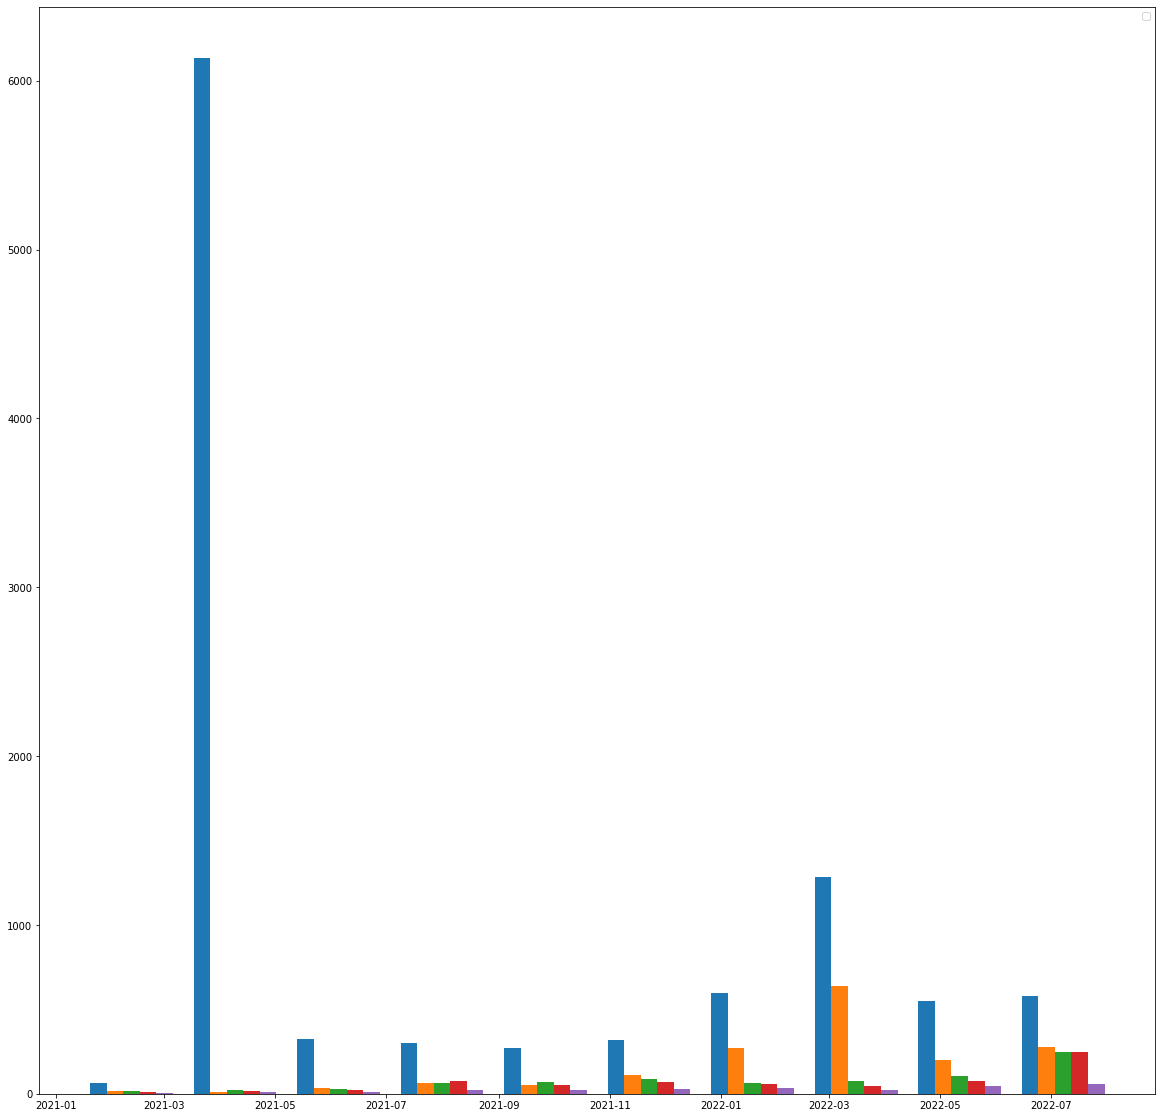

In [199]:

# diff = dfg.loc['governor_signed_date'] - dfg.loc['referred_date']


# diff = dfg[(~dfg['referred_date'].isnull()) and (~dfg['governor_signed_date'].isnull())]

# dfgn = dfg[~dfg['referred_date'].isnull()]
dfgn= dfg[['referred_date', 'ways_and_means_date', 'passed_chamber_date', 'enacted_date', 'governor_signed_date']]




plt.figure(figsize=[20, 20])
plt.legend()
plt.hist(dfgn, label=dfgn.index)


In [ ]:
import numpy as np

sdf = pd.DataFrame(actions)


sdf['schedule']= sdf['action'].str.extract(f"[^(hearing)] (order.*)", flags=IGNORECASE)


for a in sdf[~sdf['schedule'].isna()]['action']:
  print(a)

In [5]:
dft = pd.read_csv('../data/all-history-actions.csv')


In [6]:
referred = regexer("(referred)")
ways_means = regexer("(ways and means)")
engrossed = regexer("(engrossed)")
enacted = regexer("(enacted)")
signed = regexer("(signed)")

type_rs = [referred,ways_means,engrossed,enacted,signed]


def getActionType(x):
  types = []
  for r in type_rs: 
    action_type = r.search(x)
    if action_type != None: 
      type_captures = action_type.group()
      types.append(type_captures.lower())
  # return tuple(types)
  if len(types) > 0: 
    return types[-1]
  return ()
  
dft['type'] = dft['action'].apply(getActionType)
dft['short_date'] = dft['date'].apply(lambda x: parse(x).strftime("%x"))

dft[dft['type'] != ()]

,id,action,branch,date,type,short_date
0,H1,Referred to the committee on House Ways and Means,House,2021-02-25T16:46:19.933Z,ways and means,02/25/21
2,H10,Referred to the committee on Public Service,House,2021-04-13T15:59:37.223Z,referred,04/13/21
6,H10,Bill reported favorably by committee and refer...,House,2021-10-07T18:49:13.353Z,ways and means,10/07/21
7,H100,Referred to the committee on The Judiciary,House,2021-04-01T17:04:17.083Z,referred,04/01/21
9,H100,Bill reported favorably by committee and refer...,House,2021-04-14T17:35:11.223Z,referred,04/14/21
...,...,...,...,...,...,...
45449,S996,Referred to the committee on The Judiciary,Senate,2021-03-29T15:26:19.180Z,referred,03/29/21
45455,S997,Referred to the committee on The Judiciary,Senate,2021-03-29T15:26:19.180Z,referred,03/29/21
45459,S998,Referred to the committee on The Judiciary,Senate,2021-03-29T15:26:19.180Z,referred,03/29/21
45462,S999,Referred to the committee on The Judiciary,Senate,2021-03-29T15:26:19.180Z,referred,03/29/21


In [13]:
merged_df =pd.merge(df, dft)
dfmt = merged_df[merged_df['type'] != ()][['id', 'short_date', 'type']]

plt.figure(figsize=[20, 20])

plt.axes()

x = dfmt['id']
y = dfmt['type']
z = dfmt['short_date']

<Figure size 1440x1440 with 0 Axes>